In [1]:
from preprocess import WikiQA, ComplexSimple, Word2Vec
import pandas as pd
import numpy as np
%matplotlib inline

C:\Users\Simon\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
train_data = ComplexSimple(word2vec=Word2Vec())
train_data.open_file(mode="train", method='labeled')

x1_1, x1_2, y1, features1 = train_data.next_batch(batch_size=128)

train_data = WikiQA(word2vec=Word2Vec())
train_data.open_file(mode="train")

x2_1, x2_2, y2, features2 = train_data.next_batch(batch_size=128)

Data was read
flatten took: 0.032552242279052734
set creation took 0.029610633850097656s
Idf dict creation took: 23.95618176460266
iter: 0
iter: 1
iter: 2
iter: 3
Took: 0.40012335777282715
idf feature creation took: 0.5442724227905273
features took: 0.9423372745513916


In [3]:
X1_1 = np.apply_along_axis(lambda x: (x/3), axis=1, arr=x1_1)
X1_2 = np.apply_along_axis(lambda x: (x/3), axis=1, arr=x1_2)
X2_1 = x2_1
X2_2 = x2_2
feat1 = features1
feat2 = features2

In [8]:
max(feat1)

[40, 40, 38, 135.23132357411183]

In [9]:
max(feat2)

[15, 40, 2, 15.00637303437744]

In [20]:
135/15

9.0

In [10]:
x = []
y = []
for i in range(10):
    x.append(X1_1[i].mean(axis=1))
    y.append(X2_1[i].mean(axis=1))

In [11]:
df = pd.DataFrame()
df['x'] = x[3]
df['y'] = y[3]

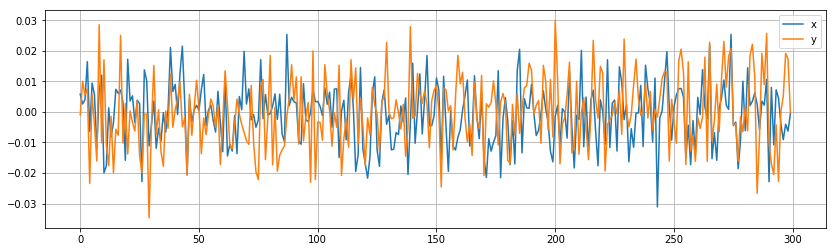

In [12]:
df.plot(grid = True, figsize=(14, 4))

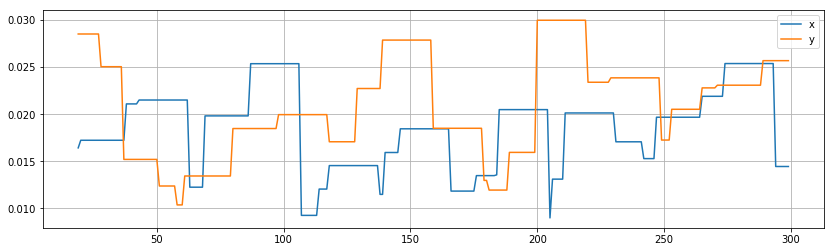

In [13]:
df.rolling(20).max().plot(grid=True, figsize=(14,4))

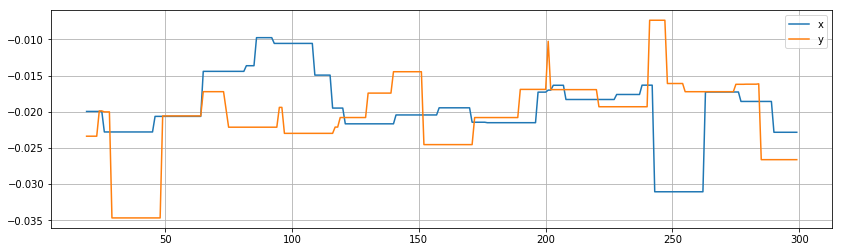

In [14]:
df.rolling(20).min().plot(grid=True, figsize=(14,4))

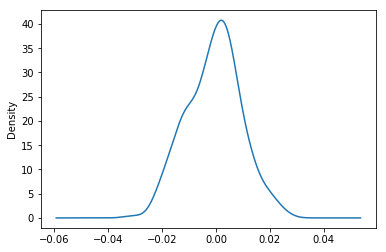

In [15]:
df['x'].plot(kind='kde')

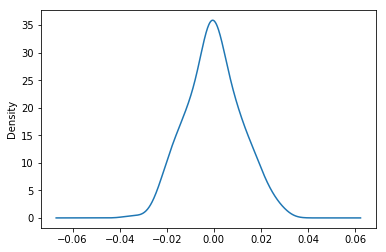

In [16]:
df['y'].plot(kind='kde')